In [234]:
from cProfile import label

import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import imghdr
import numpy as np
from tensorflow.python.ops.gen_batch_ops import batch
from tensorflow.python.ops.metrics_impl import precision, accuracy

In [235]:
data_dir = 'data'
#os.listdir(os.path.join('data', 'happy'))

In [236]:
image_exts = ['jpeg', 'png', 'bmp', 'j']

In [237]:
img = cv2.imread(os.path.join(data_dir, 'sad', 'Crying-girl.jpg'))
#plt.imshow(img)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [238]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
             print("Image not in extension list {}".format(image_path))

In [239]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [240]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].max()

np.float32(255.0)

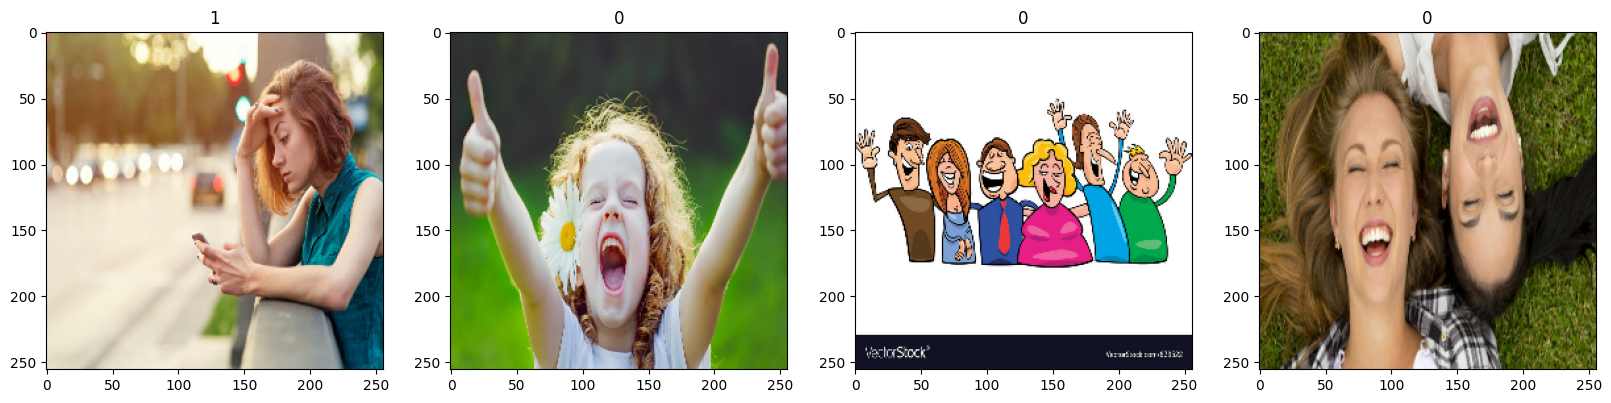

In [241]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling

In [242]:
data = data.map(lambda x, y : (x/255, y))

In [243]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [244]:
batch[0]

array([[[[7.37254918e-01, 7.41176486e-01, 7.56862760e-01],
         [7.94117630e-01, 7.98039198e-01, 8.13725471e-01],
         [8.27450991e-01, 8.39215696e-01, 8.58823538e-01],
         ...,
         [6.27125442e-01, 6.15360737e-01, 5.95752895e-01],
         [6.22878373e-01, 6.11113667e-01, 5.91505826e-01],
         [6.15035236e-01, 6.03270531e-01, 5.83662689e-01]],

        [[7.41176486e-01, 7.45098054e-01, 7.60784328e-01],
         [7.92156875e-01, 7.96078444e-01, 8.11764717e-01],
         [8.25490177e-01, 8.37254882e-01, 8.56862724e-01],
         ...,
         [6.31372571e-01, 6.19607866e-01, 6.00000024e-01],
         [6.21576309e-01, 6.09811604e-01, 5.90203762e-01],
         [6.19607866e-01, 6.07843161e-01, 5.88235319e-01]],

        [[7.30373025e-01, 7.48353243e-01, 7.60117948e-01],
         [7.82019734e-01, 8.00000012e-01, 8.11764717e-01],
         [8.21568608e-01, 8.41176450e-01, 8.52941155e-01],
         ...,
         [6.35294139e-01, 6.23529434e-01, 6.03921592e-01],
         [

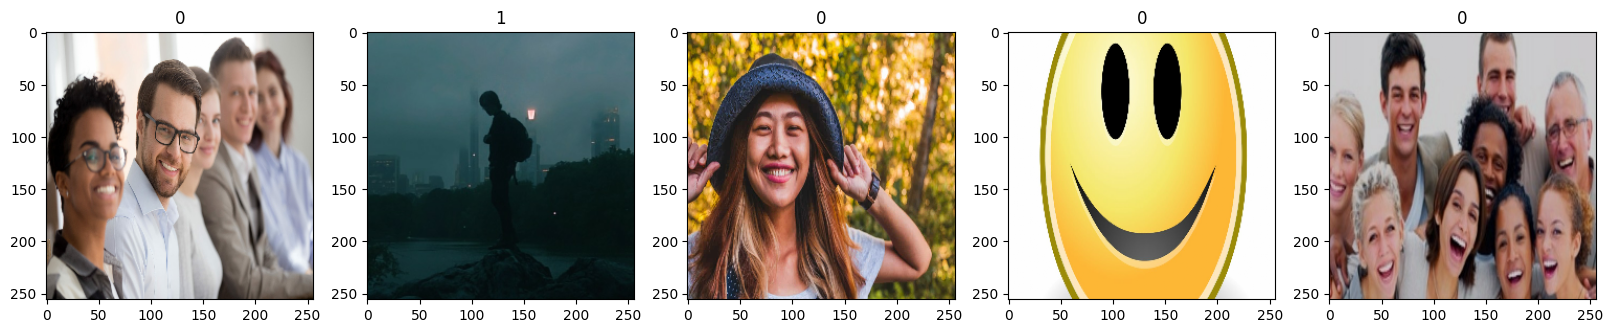

In [245]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [246]:
len(data)

6

In [247]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [248]:
test_size+train_size+val_size

6

In [249]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [251]:
model = Sequential()

In [252]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ammar\PycharmProjects\JupyterProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [253]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [254]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [255]:
logdir='logs'

In [256]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [257]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.5234 - loss: 1.2131 - val_accuracy: 0.4688 - val_loss: 0.7564
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.5703 - loss: 0.6728 - val_accuracy: 0.6875 - val_loss: 0.5660
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6094 - loss: 0.6068 - val_accuracy: 0.6562 - val_loss: 0.5664
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.7422 - loss: 0.5496 - val_accuracy: 0.5625 - val_loss: 0.6995
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.7578 - loss: 0.5086 - val_accuracy: 0.7812 - val_loss: 0.5225
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.8047 - loss: 0.4954 - val_accuracy: 0.8125 - val_loss: 0.4819
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.8125 - loss: 0.4368 - val_accuracy: 0.9375 - val_loss: 0.3208
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.8125 - loss: 0.3934 - val_accuracy: 0.7812 - val_loss:

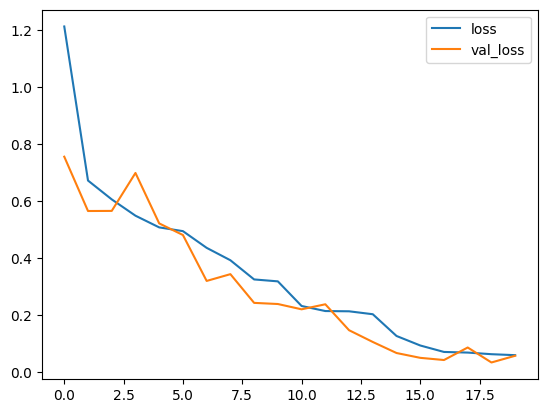

In [258]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

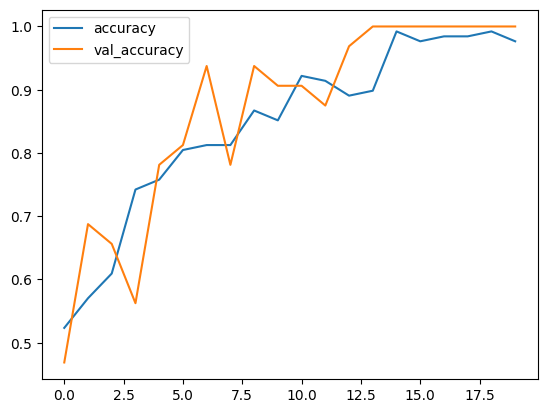

In [259]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [260]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [261]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [262]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [263]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


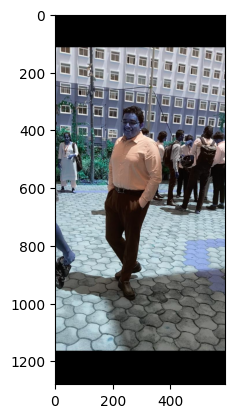

In [279]:
img = cv2.imread('img.png')
plt.imshow(img)
plt.show()

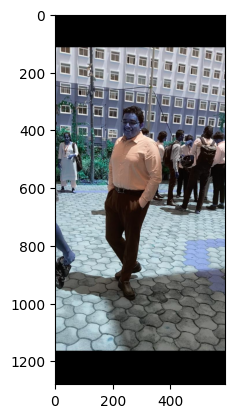

In [280]:
resize = tf.image.resize(img, (256,256))
plt.imshow(img)

In [281]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [282]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [283]:
yhat

array([[0.0225301]], dtype=float32)

In [284]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy
